# <font color='red'>Clustering Assignment</font>

**There will be some functions that start with the word "grader" ex: grader_actors(), grader_movies(), grader_cost1() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

**Please check [clustering assignment helper functions](https://drive.google.com/file/d/1V29KhKo3YnckMX32treEgdtH5r90DIjU/view?usp=sharing) notebook before attempting this assignment.**

*  Read graph from the given <font color='blue'>movie_actor_network.csv</font> (note that the graph is bipartite graph.)

*  Using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph. [Refer <font color='blue'>Clustering_Assignment_Reference.ipynb</font>]

* Split the dense representation into actor nodes, movies nodes.(Write you code in <font color='blue'>def data_split()</font>)


# <font color='red'>Task 1 : Apply clustering algorithm to group similar actors</font>

 1. For this task consider only the actor nodes 
 2. Apply any clustering algorithm of your choice <br>
    Refer : https://scikit-learn.org/stable/modules/clustering.html
 3. Choose the number of clusters for which you have maximum score of <b>$Cost1*Cost2$</b><br>
 4. Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters 
<br> (Write your code in <font color='blue'>def cost1()</font>)<br>
 5. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 
 <br> (Write your code in <font color='blue'>def cost2()</font>)<br>
 6. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
 7. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
 8. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color

<img src='https://i.imgur.com/4SPYPFa.jpg'>

# <font color='red'>Task 2 : Apply clustering algorithm to group similar movies</font>


1. For this task consider only the movie nodes
2. Apply any clustering algorithm of your choice
3.Choose the number of clusters for which you have maximum score of $Cost1*Cost2$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br>
(Write your code in <font color='blue'>def cost1()</font>)<br>
	
4. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$ 
where N= number of clusters 
<br>(Write your code in <font color='blue'>def cost2()</font>)<br>


**Algorithm for actor nodes**

<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
        You can get the labels for corresponding actor nodes (algo.labels_)
        Create a graph for every cluster(ie., if n_clusters=3, create 3 graphs)
        (You can use ego_graph to create subgraph from the actual graph)
        compute cost1,cost2 
           (if n_cluster=3, cost1=cost1(graph1)+cost1(graph2)+cost1(graph3) # here we are doing summation
            cost2=cost2(graph1)+cost2(graph2)+cost2(graph3)
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

<br>

#Import

In [1]:
!pip install networkx==2.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 14.3 MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556008 sha256=da4f14e79a59248a6c32a0b5f46d93e4d3971728bb1dd89e105bc3a29a53b984
  Stored in directory: /root/.cache/pip/wheels/44/e6/b8/4efaab31158e9e9ca9ed80b11f6b11130bac9a9672b3cbbeaf
Successfully built networkx
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
pip install stellargraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 435 kB 22.2 MB/s 


In [3]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# you need to have tensorflow 
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph
from sklearn.cluster import KMeans
import tqdm
from sklearn.manifold import TSNE

#Data Import

In [4]:
data=pd.read_csv('movie_actor_network.csv', index_col=False, names=['movie','actor'])

In [5]:
data.values

array([['m1', 'a1'],
       ['m2', 'a1'],
       ['m2', 'a2'],
       ...,
       ['m1381', 'a1225'],
       ['m1381', 'a1436'],
       ['m1381', 'a1926']], dtype=object)

In [6]:
edges = [tuple(x) for x in data.values.tolist()]

In [7]:
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')

In [8]:
A = list(nx.connected_component_subgraphs(B))[0]

In [9]:
print("number of nodes", A.number_of_nodes())
print("number of edges", A.number_of_edges())

number of nodes 4703
number of edges 9650


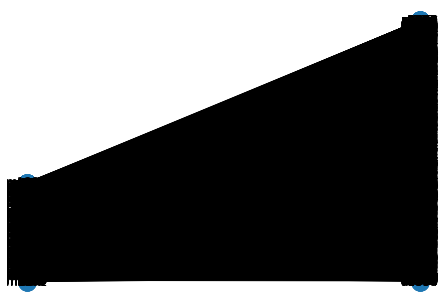

In [10]:
l, r = nx.bipartite.sets(A)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
  
nx.draw(A, pos=pos, with_labels=True)
plt.show()

In [11]:
movies = []
actors = []
for i in A.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors))

number of movies  1292
number of actors  3411


In [12]:
# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(A))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(A.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [13]:
from gensim.models import Word2Vec
model = Word2Vec(walks, size=128, window=5)

In [14]:
model.wv.vectors.shape  # 128-dimensional vector for each node in the graph

(4703, 128)

In [15]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ A.node[node_id]['label'] for node_id in node_ids]

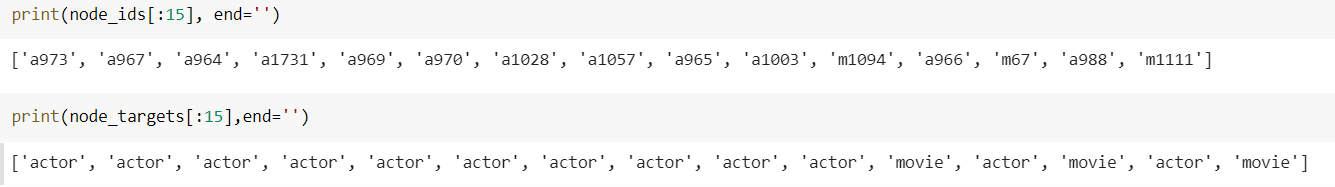

In [16]:
def data_split(node_ids,node_targets,node_embeddings):
    '''In this function, we will split the node embeddings into actor_embeddings , movie_embeddings '''
    actor_nodes,movie_nodes=[],[]
    actor_embeddings,movie_embeddings=[],[]
    for i in range(len(node_ids)):
      if 'm' in node_targets[i]:
        movie_nodes.append(node_ids[i])
        movie_embeddings.append(node_embeddings[i])
      else:
        actor_nodes.append(node_ids[i])  
        actor_embeddings.append(node_embeddings[i])


    return actor_nodes,movie_nodes,actor_embeddings,movie_embeddings

In [17]:
#https://stackoverflow.com/questions/1012185/in-python-how-do-i-index-a-list-with-another-list
def data_split(node_ids,node_targets,node_embeddings):

  '''In this function, we will split the node embeddings into actor_embeddings , movie_embeddings '''
  actor_nodes,movie_nodes=[],[]
  actor_embeddings,movie_embeddings=[],[]

  for i in range((len(node_ids))):
    if 'a' in node_targets[i]:
      actor_nodes.append(node_ids[i])
      actor_embeddings.append(node_embeddings[i])
    else:
      movie_nodes.append(node_ids[i])
      movie_embeddings.append(node_embeddings[i])
    


    # split the node_embeddings into actor_embeddings,movie_embeddings based on node_ids
    # By using node_embedding and node_targets, we can extract actor_embedding and movie embedding
    # By using node_ids and node_targets, we can extract actor_nodes and movie nodes

  return actor_nodes,movie_nodes,actor_embeddings,movie_embeddings
actor_nodes,movie_nodes,actor_embeddings,movie_embeddings = data_split(node_ids,node_targets,node_embeddings)

In [18]:
print(type(actor_nodes))
print(type(movie_nodes))
print(type(actor_embeddings))
print(type(actor_embeddings))


<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


<font color='cyan'>Grader function - 1</font>

In [19]:
def grader_actors(data):
    assert(len(data)==3411)
    return True
grader_actors(actor_nodes)

True

<font color='cyan'>Grader function - 2</font>

In [20]:
def grader_movies(data):
    assert(len(data)==1292)
    return True
grader_movies(movie_nodes)

True

<font color='blue'>Calculating cost1</font>

Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
<br>

In [26]:
def cost1(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    #cost1= # calculate cost1 
    nodes = nx.connected_components(graph)
    max_nodes = 0
    for i in nodes:
      if len(i) > max_nodes:
        max_nodes = len(i)
    max_nodes
    all_nodes = graph.number_of_nodes()
    cost1 = (max_nodes/all_nodes)

    return cost1/number_of_clusters

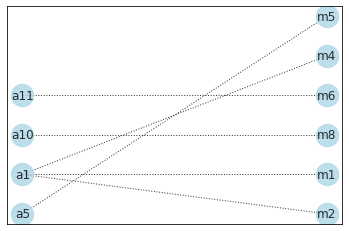

In [22]:
import networkx as nx
from networkx.algorithms import bipartite
graded_graph= nx.Graph()
graded_graph.add_nodes_from(['a1','a5','a10','a11'], bipartite=0) # Add the node attribute "bipartite"
graded_graph.add_nodes_from(['m1','m2','m4','m6','m5','m8'], bipartite=1)
graded_graph.add_edges_from([('a1','m1'),('a1','m2'),('a1','m4'),('a11','m6'),('a5','m5'),('a10','m8')])
l={'a1','a5','a10','a11'};r={'m1','m2','m4','m6','m5','m8'}
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
nx.draw_networkx(graded_graph, pos=pos, with_labels=True,node_color='lightblue',alpha=0.8,style='dotted',node_size=500)

<font color='cyan'>Grader function - 3</font>

In [27]:
graded_cost1=cost1(graded_graph,3)
def grader_cost1(data):
    assert(data==((1/3)*(4/10))) # 1/3 is number of clusters
    return True
grader_cost1(graded_cost1)

True

<font color='blue'>Calculating cost2</font>

Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 

In [28]:
def cost2(graph,number_of_clusters):
  '''In this function, we will calculate cost1'''
  actor_degree =0
  mov_degree =0
  for val in graded_graph.degree():
  #print(val)
    if 'a' in val[0]:
      actor_degree += val[1]
    else:
      mov_degree = mov_degree +1
  cost2= (actor_degree/mov_degree)
  
  return cost2/number_of_clusters

<font color='cyan'>Grader function - 4</font>

In [29]:
graded_cost2=cost2(graded_graph,3)
def grader_cost2(data):
    assert(data==((1/3)*(6/6))) # 1/3 is number of clusters
    return True
grader_cost2(graded_cost2)

True

#Grouping 

<font color='blue'>Grouping similar actors</font>

In [39]:
#https://www.geeksforgeeks.org/ego-graph-using-networkx-in-python/
cost_list=[]
values = [3,5,10,30,50,100,200,500]

for clust in [3,5,10,30,50,100,200,500]:

  model = KMeans(n_clusters = clust)
  model.fit(actor_embeddings)
  labels = model.labels_

  for i in range(clust):
    #Graph for each cluster
    G1 = nx.Graph()    
    #seprating nodes on based of labesl
    index_i=[k for k, v in enumerate(labels) if v == i]
    label_index=[ actor_nodes[i] for i in index_i]
    #print(len(label_i))
    for node in label_index:
      #print(node)
      sub_graph=nx.ego_graph(B,node)
      G1.add_nodes_from(sub_graph.nodes)
      G1.add_edges_from(sub_graph.edges())
  
    val1 = cost1(G1,clust)
    val1=val1 +val1
    val2 = cost2(G1,clust)
    val2=val2 + val2 
  total_cost = val1*val2
  
  cost_list.append(total_cost)
  total_cost = 0
  #print(total_cost)

print(cost_list)
best_k = values[np.argmax(cost_list)]
print('the max cost cluster is ',best_k)

[0.40408514827119474, 0.16000000000000003, 0.02178046672428695, 0.0044444444444444444, 0.0008533333333333333, 2.938775510204082e-05, 5.405405405405406e-05, 1.6e-05]
the max cost cluster is  3


<font color='blue'>Displaying similar actor clusters</font>

In [43]:
model = KMeans(n_clusters = best_k)
model.fit(actor_embeddings)
labels = model.labels_

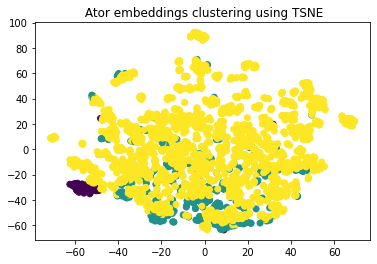

In [44]:
#https://stackoverflow.com/questions/28227340/kmeans-scatter-plot-plot-different-colors-per-cluster
model2 = TSNE(n_components = 2)
final_embeddings = model2.fit_transform(actor_embeddings) 



plt.scatter(final_embeddings[:,0], final_embeddings[:,1], c=labels.astype(float))
plt.title(' Ator embeddings clustering using TSNE')
plt.show()

<font color='blue'>Grouping similar movies</font>

In [35]:
#https://www.geeksforgeeks.org/ego-graph-using-networkx-in-python/
cost_list=[]
values = [3,5,10,30,50,100,200,500]

for clust in [3,5,10,30,50,100,200,500]:

  model = KMeans(n_clusters = clust)
  model.fit(movie_embeddings)
  labels = model.labels_

  for i in range(clust):
    #Graph for each cluster
    G1 = nx.Graph()    
    #seprating nodes on based of labesl
    index_i=[k for k, v in enumerate(labels) if v == i]
    label_index=[ movie_nodes[i] for i in index_i]
    #print(len(label_i))
    for node in label_index:
      #print(node)
      sub_graph=nx.ego_graph(B,node)
      G1.add_nodes_from(sub_graph.nodes)
      G1.add_edges_from(sub_graph.edges())
  
    val1 = cost1(G1,clust)
    val1=val1 +val1
    val2 = cost2(G1,clust)
    val2=val2 + val2 
  total_cost = val1*val2
  cost_list.append(total_cost)
  total_cost = 0

print(cost_list)
best_k = values[np.argmax(cost_list)]
print('the max cost cluster is ',best_k)

[0.4390499737768787, 0.13790901835594574, 0.020223602484472053, 0.0044444444444444444, 0.0016, 0.0004, 0.0001, 1.6e-05]
the max cost cluster is  3


<font color='blue'>Displaying similar movie clusters</font>

In [45]:
model = KMeans(n_clusters = best_k)
model.fit(movie_embeddings)
labels = model.labels_

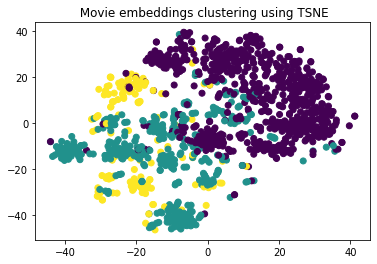

In [46]:
model2 = TSNE(n_components = 2)
final_embeddings = model2.fit_transform(movie_embeddings) 

plt.scatter(final_embeddings[:,0], final_embeddings[:,1], c=labels.astype(float))
plt.title(' Movie embeddings clustering using TSNE')
plt.show()